In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
# # from google.colab import files 


# uploaded = files.upload()


In [98]:
# import io 

# df = pd.read_csv(io.BytesIO(uploaded['train_BM.csv'])) 
# print(df)


In [99]:
from google.colab import files 
df= pd.read_csv('/content/drive/MyDrive/train_BM.csv')

In [100]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [101]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [102]:
#missing value %age of product cat 2 and 3
missing_val_PC2 = df.Product_Category_2.isnull().sum()
total_miss_PC2= missing_val_PC2.sum()
total_cell_PC2 = np.product(df.Product_Category_2.shape)
perc_miss_PC2 = (total_miss_PC2/total_cell_PC2)*100

missing_val_PC3 = df.Product_Category_3.isnull().sum()
total_miss_PC3= missing_val_PC3.sum()
total_cell_PC3 = np.product(df.Product_Category_3.shape)
perc_miss_PC3 = (total_miss_PC3/total_cell_PC3)*100
perc_miss_PC3


print(perc_miss_PC2, '|' ,perc_miss_PC3)

31.56664266963357 | 69.67265865311198


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [104]:
#df.fillna(df.mean(), inplace= True)
df.fillna(0, inplace= True)

In [105]:
df.Gender = np.where(df.Gender== 'M',1,0)

In [106]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,0.0,0.0,7969
5,1000003,P00193542,1,26-35,15,A,3,0,1,2.0,0.0,15227
6,1000004,P00184942,1,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,1,46-50,7,B,2,1,1,15.0,0.0,15854
8,1000004,P0097242,1,46-50,7,B,2,1,1,16.0,0.0,15686
9,1000005,P00274942,1,26-35,20,A,1,1,8,0.0,0.0,7871


In [107]:
# from sklearn.preprocessing import  LabelEncoder , OneHotEncoder
# ohe = OneHotEncoder()
# ohe_df = pd.DataFrame(enc.fit_transform(df[['Age']]).toarray())
# df= df.join(ohe_df)
# df.head(10)

In [108]:
from sklearn.preprocessing import LabelEncoder
LA= LabelEncoder()
df['Product_ID']= LA.fit_transform(df['Product_ID'])
df_age = pd.get_dummies(df['Age'])
df= pd.concat([df, df_age],axis =1)
cc= pd.get_dummies(df['City_Category'])
df= pd.concat([df,cc],axis=1)
ss2 = pd.get_dummies(df['Stay_In_Current_City_Years'])
df= pd.concat([df,ss2],axis=1)
df= df.drop(['City_Category','Age', 'Stay_In_Current_City_Years'],axis=1) #,'Marital_Status'
df =df[['User_ID','Product_ID','Gender','Occupation','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3','0-17', '18-25','26-35','36-45','46-50','51-55','A','B','C','0','1','2','3','4+','Purchase']] #'Marital_Status' as dropped
df.head(10)

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,0-17,18-25,26-35,36-45,46-50,51-55,A,B,C,0,1,2,3,4+,Purchase
0,1000001,672,0,10,0,3,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,8370
1,1000001,2376,0,10,0,1,6.0,14.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,15200
2,1000001,852,0,10,0,12,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1422
3,1000001,828,0,10,0,12,14.0,0.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1057
4,1000002,2734,1,16,0,8,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,7969
5,1000003,1831,1,15,0,1,2.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,15227
6,1000004,1745,1,7,1,1,8.0,17.0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,19215
7,1000004,3320,1,7,1,1,15.0,0.0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,15854
8,1000004,3604,1,7,1,1,16.0,0.0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,15686
9,1000005,2631,1,20,1,8,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,7871


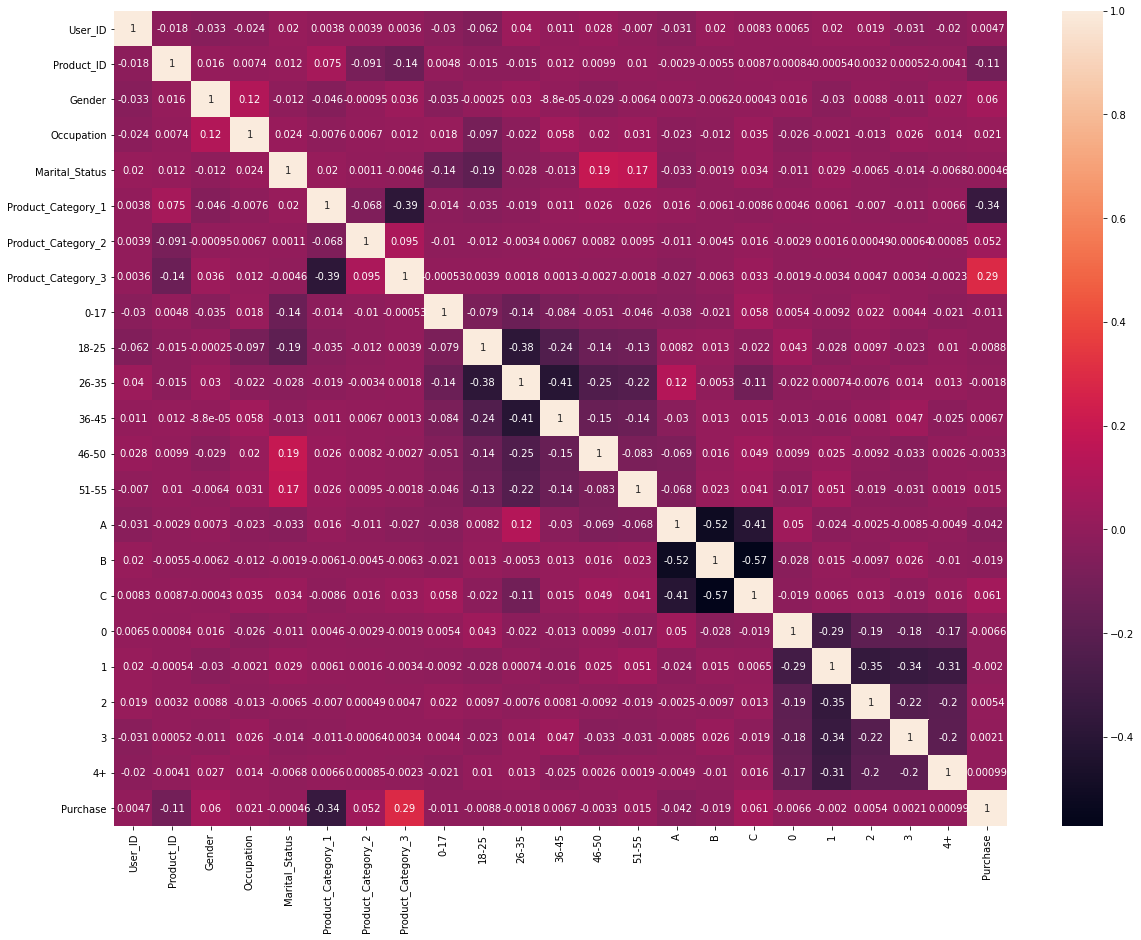

In [109]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [110]:
#sns.boxplot(data=df['Gender'])

In [111]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# ###df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns) # since this is  also transforming Purchase target
# df[['User_ID','Product_ID','Gender','Occupation','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3','0-17', '18-25','26-35','36-45','46-50','51-55','A','B','C','0','1','2','3','4+']] = scaler.fit_transform(df[['User_ID','Product_ID','Gender','Occupation','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3','0-17', '18-25','26-35','36-45','46-50','51-55','A','B','C','0','1','2','3','4+']])
# df.head(10)

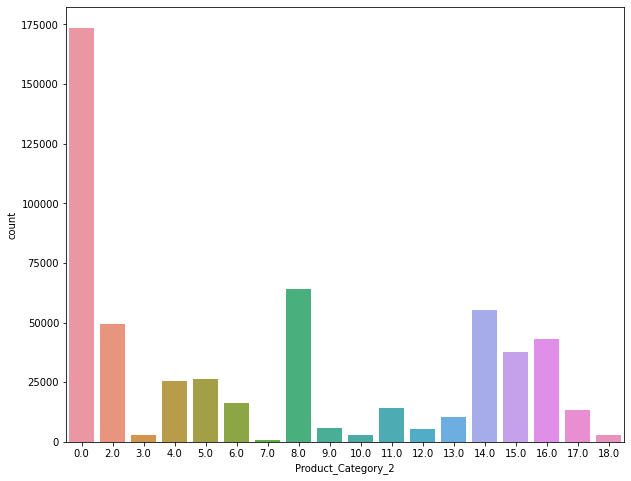

In [112]:
 # import seaborn as sns
# import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.countplot(x= 'Product_Category_2',data=df)

In [113]:
# plt.figure(figsize=(20,15))
# sns.heatmap(df.corr(),annot=True)

In [114]:
df.shape

(550068, 23)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   User_ID             550068 non-null  int64  
 1   Product_ID          550068 non-null  int64  
 2   Gender              550068 non-null  int64  
 3   Occupation          550068 non-null  int64  
 4   Marital_Status      550068 non-null  int64  
 5   Product_Category_1  550068 non-null  int64  
 6   Product_Category_2  550068 non-null  float64
 7   Product_Category_3  550068 non-null  float64
 8   0-17                550068 non-null  uint8  
 9   18-25               550068 non-null  uint8  
 10  26-35               550068 non-null  uint8  
 11  36-45               550068 non-null  uint8  
 12  46-50               550068 non-null  uint8  
 13  51-55               550068 non-null  uint8  
 14  A                   550068 non-null  uint8  
 15  B                   550068 non-nul

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X = df.drop(['Purchase'], axis=1) #more efficient code just like taking compliment instead of hand typing all features
Y= df['Purchase']

In [118]:
X_train ,X_test, Y_train, Y_test= train_test_split(X,Y, test_size = 0.3 , random_state= 1)

In [119]:
print(X_train.size,X_test.size)

8471034 3630462


In [120]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor 

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0) 

# fit the regressor with X and Y data 
model2= regressor.fit(X_train, Y_train) 
DT_prediction = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
mse =mean_squared_error(Y_test, model_2)
print('MSE:',mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(Y_test, model_2)
print('R2:', r2)

MSE: 14098693.669163318
RMSE: 3754.8227214028784
R2: 0.4421557886205303


In [121]:
# from sklearn.linear_model import LinearRegression
# model1 = LinearRegression().fit(X_train, Y_train)

In [122]:
np.set_printoptions(suppress= True)
print('Predicted_Labels:',(DT_prediction)[:10])
print('Actual Labels:' ,  Y_test[:10])

Predicted_Labels: [ 6095.  3463.  6048.  8077.  7818.  8747.  5169. 11810. 19092.  8051.]
Actual Labels: 470060     8013
395974     2769
14234      5952
72183      9914
272536    15472
16702      6943
452591     5215
183076    11734
385861    15551
215795    13406
Name: Purchase, dtype: int64


Importing test file 

In [123]:
test_df= pd.read_csv('/content/drive/MyDrive/test_BM.csv')

In [124]:
#test_df = pd.read_csv(io.BytesIO(uploaded['test_BM.csv'])) 
print(test_df)

        User_ID Product_ID  ... Product_Category_2 Product_Category_3
0       1000004  P00128942  ...               11.0                NaN
1       1000009  P00113442  ...                5.0                NaN
2       1000010  P00288442  ...               14.0                NaN
3       1000010  P00145342  ...                9.0                NaN
4       1000011  P00053842  ...                5.0               12.0
...         ...        ...  ...                ...                ...
233594  1006036  P00118942  ...                NaN                NaN
233595  1006036  P00254642  ...                8.0                NaN
233596  1006036  P00031842  ...                5.0               12.0
233597  1006037  P00124742  ...               16.0                NaN
233598  1006039  P00316642  ...                5.0                NaN

[233599 rows x 11 columns]


In [125]:
test_df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
5,1000013,P00350442,M,46-50,1,C,3,1,2,3.0,15.0
6,1000013,P00155442,M,46-50,1,C,3,1,1,11.0,15.0
7,1000013,P0094542,M,46-50,1,C,3,1,2,4.0,9.0
8,1000015,P00161842,M,26-35,7,A,1,0,10,13.0,16.0
9,1000022,P00067942,M,18-25,15,A,4+,0,5,14.0,NaN


In [126]:
#missing value %age of product cat 2 and 3
missing_val_PC2 = test_df.Product_Category_2.isnull().sum()
total_miss_PC2= missing_val_PC2.sum()
total_cell_PC2 = np.product(test_df.Product_Category_2.shape)
perc_miss_PC2 = (total_miss_PC2/total_cell_PC2)*100

missing_val_PC3 = test_df.Product_Category_3.isnull().sum()
total_miss_PC3= missing_val_PC3.sum()
total_cell_PC3 = np.product(test_df.Product_Category_3.shape)
perc_miss_PC3 = (total_miss_PC3/total_cell_PC3)*100
perc_miss_PC3


print(perc_miss_PC2, '|' ,perc_miss_PC3)

30.96931065629562 | 69.59019516350669


test dATA clean

In [127]:
#test_df.fillna(test_df.mean(), inplace= True)
test_df.fillna(0, inplace= True)
test_df.Gender = np.where(test_df.Gender== 'M',1,0)
test_df['Product_ID']= LA.fit_transform(test_df['Product_ID'])
tt_age = pd.get_dummies(test_df.Age)
test_df= pd.concat([test_df, tt_age],axis =1)
cc_t= pd.get_dummies(test_df['City_Category'])
test_df= pd.concat([test_df,cc_t],axis=1)
tt2 = pd.get_dummies(test_df['Stay_In_Current_City_Years'])
test_df= pd.concat([test_df,tt2],axis=1)
test_df= test_df.drop(['City_Category','Age', 'Stay_In_Current_City_Years'],axis=1) #,'Marital_Status'
#test_df =test_df[['User_ID','Product_ID','Gender','Occupation','Product_Category_1','Product_Category_2','Product_Category_3','0-17', '18-25','26-35','36-45','46-50','51-55','A','B','C','0','1','2','3','4+']] #'Marital_Status' as dropped
#scaling data#
#test_df = pd.DataFrame(scaler.fit_transform(test_df), columns = test_df.columns)
test_df.head(10)


,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,0-17,18-25,26-35,36-45,46-50,51-55,55+,A,B,C,0,1,2,3,4+
0,1000004,1144,1,7,1,1,11.0,0.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,1000009,994,1,17,0,3,5.0,0.0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
2,1000010,2672,0,1,1,5,14.0,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,1000010,1299,0,1,1,4,9.0,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,1000011,519,0,1,0,4,5.0,12.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
5,1000013,3240,1,1,1,2,3.0,15.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
6,1000013,1399,1,1,1,1,11.0,15.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
7,1000013,3437,1,1,1,2,4.0,9.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
8,1000015,1458,1,7,0,10,13.0,16.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
9,1000022,638,1,15,0,5,14.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [128]:
X_t= test_df[['User_ID','Product_ID','Gender','Occupation','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3','0-17', '18-25','26-35','36-45','46-50','51-55','A','B','C','0','1','2','3','4+']] #'Marital_Status'

In [129]:
final_pred = model2.predict(X_t)
print(final_pred)
final_pred

[ 3847. 13369.  5148. ... 11823. 23714.  2122.]


array([ 3847., 13369.,  5148., ..., 11823., 23714.,  2122.])

In [130]:
#final_pred= final_pred.reshape(-1, 1)

In [131]:
# # create empty table with 22 fields
# final_pred_dataset_like = np.zeros(shape=(len(final_pred), 22) )
# # put the predicted values in the right field
# final_pred_dataset_like[:,0] = final_pred[:,0]
# # inverse transform and then select the right field
# final_pred_denormal = scaler.inverse_transform(final_pred_dataset_like)[:,0]
# #final_pred_denormal = pd.DataFrame(scaler.inverse_transform(final_pred), columns = final_pred.columns)

In [132]:
#  print(final_pred_denormal)

Preparing the csv file for submission


In [133]:
test_df

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,0-17,18-25,26-35,36-45,46-50,51-55,55+,A,B,C,0,1,2,3,4+
0,1000004,1144,1,7,1,1,11.0,0.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,1000009,994,1,17,0,3,5.0,0.0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
2,1000010,2672,0,1,1,5,14.0,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,1000010,1299,0,1,1,4,9.0,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,1000011,519,0,1,0,4,5.0,12.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,1049,0,15,1,8,0.0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
233595,1006036,2345,0,15,1,5,8.0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
233596,1006036,303,0,15,1,1,5.0,12.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
233597,1006037,1105,0,1,0,10,16.0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [134]:
df3 = pd.read_csv('/content/drive/MyDrive/test_BM.csv')

In [135]:
df3.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [136]:
df3['Purchase']= final_pred

In [137]:
df3.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,3847.0
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,13369.0
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,5148.0
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,2756.0
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,2847.0


In [138]:
final_sub2 = df3[['Purchase','User_ID', 'Product_ID']]

In [139]:
final_sub2.head()

,Purchase,User_ID,Product_ID
0,3847.0,1000004,P00128942
1,13369.0,1000009,P00113442
2,5148.0,1000010,P00288442
3,2756.0,1000010,P00145342
4,2847.0,1000011,P00053842


In [140]:
#final_sub2.to_csv('BlackfridayDT2.csv')